# POISON DISTRIBUTION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
plt.rcParams['font.family'] = 'Sans-serif' #全体のフォントを設定
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams['font.size'] = 12 #フォントサイズを設定 default : 12
plt.rcParams['xtick.labelsize'] = 15 # 横軸のフォントサイズ
plt.rcParams['ytick.labelsize'] = 15

## 1. Tổng quan

### 1.1 Difination
A Poisson distribution is a tool that helps to predict the probability of certain events from happening when you know how often the event has occurred. The Poisson distribution gives us the probability of a given number of events happening in a fixed interval of time.


### 1.2 How to use poisson distribution in real life
The limiting case of binomial when n is very large and p is small but np is a positive number which is called lambda.

This result application is used to model various real life events by Poisson Distribution.

The classical example of the Poisson distribution is the number of Prussian soldiers accidentally killed by horse-kick, due to being the first example of the Poisson distribution's application to a real-world large data set. Ten army corps were observed over 20 years, for a total of 200 observations, and 122 soldiers were killed by horse-kick over that time period. The question is how many deaths would be expected over a period of a year, which turns out to be excellently modeled by the Poisson distribution.

Được sử dụng khi số lượng N quá lớn, trong khi xác xuất xảy ra 1 sự kiện lại quá nhỏ


### 1.3 Ứng dụng của Poisson trong Predict

Thường được sử dụng trong dự đoán số lượng customer hoặc doanh thu của 1 ngày hay một mùa nhất định trong năm.

Dựa vào kết quả dự báo, có thể giúp khách sạn hay nhà hàng chuẩn bị sẵn sàng, mở rộng hay tăng số lượng nhân viên tạm thời vào đúng thời điểm cần thiết


### 1.4 Calculating
\begin{align}
P(x; μ) = \frac{e^{-μ} * μx }{x!}
\end{align}

Trong đó : 
* μ or λ is event rate, sometimes called the rate parameter
* The number of event

### 1.5 Diffirence between Poisson and Binominal Distribution

* If your question has an average probability of an event happening per unit (i.e. per unit of time, cycle, event) and you want to find probability of a certain number of events happening in a period of time (or number of events), then use the Poisson Distribution.

* If you are given an exact probability and you want to find the probability of the event happening a certain number out times out of x (i.e. 10 times out of 100, or 99 times out of 1000), use the Binomial Distribution formula.

* The binomial distribution counts discrete occurrences among discrete trials.

* The poisson distribution counts discrete occurrences among a continuous domain.




* Nếu câu hỏi có liên quan tới xác xuất trung bình của một sự kiện xảy ra trong một đơn vị như ( ex: Thời gian, vòng lặp, sự kiện) và muốn tìm xác xuất chắc chắn số số lần xảy ra của sự kiện trong khoảng thời gian thì sử dụng Poisson.

* Nếu câu hỏi liên quan chính xác đến số lần xảy ra của 1 sự kiện trong 1 khoảng thời gian, sử dụng Binomial Distribution

* Binomial sử dụng để đếm các phép thử có giá trị rời rạc.

* Poisson sử dụng đểm các phép thử có giá trị liên tục

# 2. Công thức

In [18]:
def factorial(x):
    if x == 0:
        return 1
    
    fac = 1
    for i in range(x):
        fac *= (i + 1)
    return fac

# pmf : Probability mass function (Hàm khối xác xuất)
def pmf(x, myu):
    return (np.power(np.e, -myu) * np.power(myu, x))/factorial(x)

# 3. Example

## 3.1 Ex1

Question: The average number of major storms in your city is 2 per year. What is the probability that exactly 3 storms will hit your city next year?

VI : Số lượng trung bình bão đổ bộ trung bình là 2 lần mỗi năm. Hỏi xác xuất là bao nhiêu khi khi có 3 trận bão đổ bộ vào trong 1 năm

In [19]:
myu = 2 # Average number of storms per year, historycally
x = 3   # The number of storms we think might hit next year
print(str(np.round(pmf(x, myu)*100, 2)) + '%')

18.04%


## 3.2 Ex2

Question : Cho tập data lưu lại số lần nước tràn bờ sông trong 100 năm.
* Tính xác xuất :
P (X = 0) : Không có lần nào nước tràn bờ đê
P (X = 1) : 1 lần
...
P (X = 100) : Nước tràn bờ đê 100 lần

In [28]:
river_observations = pd.DataFrame(np.random.poisson(lam = 3, size = 100), columns = ['Numbers'])
river_observations['count'] = [1] * len(river_observations)

In [29]:
river_observations.head()

,Numbers,count
0,2,1
1,2,1
2,3,1
3,2,1
4,3,1


### 3.2.1 Xác xuất được tính dựa vào Data

In [37]:
# Xác xuất xảy ra được tính dựa theo data
river_observations.groupby('Numbers').count()/len(river_observations) * 100

,count
Numbers,
0,3.0
1,12.0
2,27.0
3,16.0
4,21.0
5,11.0
6,6.0
7,4.0


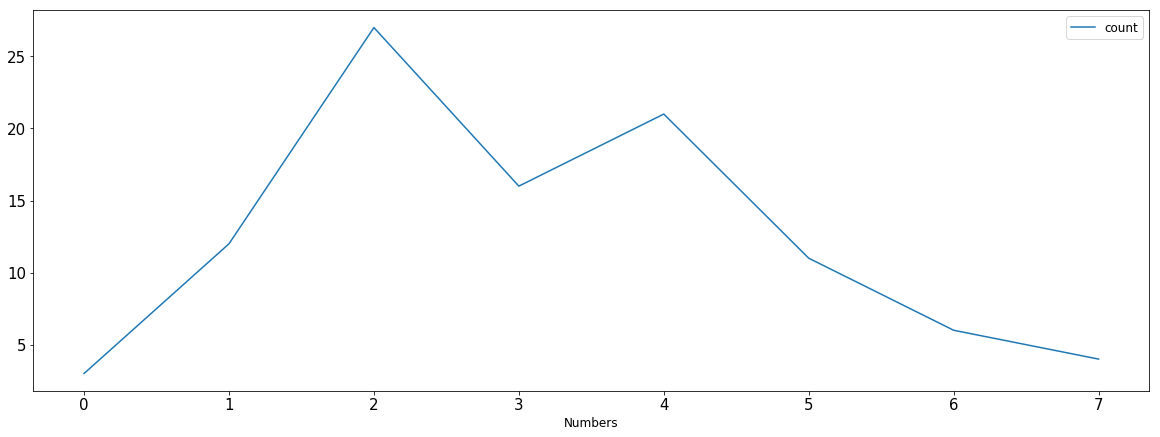

In [38]:
pd.DataFrame(river_observations.groupby('Numbers').count()/len(river_observations) * 100).plot()

### 3.2.2 Xác xuất tính dựa vào công thức

In [55]:
mean_river = 3

In [56]:
river_observations1 = []
for i in range(8):
    river_observations1.append(pmf(i, mean_river) * 100)

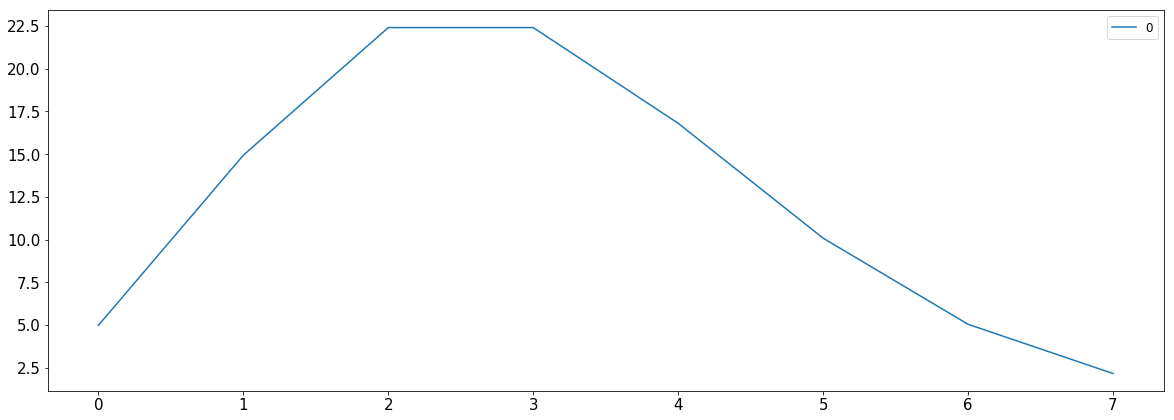

In [57]:
pd.DataFrame(river_observations1).plot()